# WeRateDogs Data Visualization
### By Shubh

## Introduction
The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## Gathering Data
<ol>
    <li>The twitter_archive_enhanced.csv file was provided to me.</li>
    <li>Image Prediction: What breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</li>
    <li>Twitter API and Python's Tweepy library to gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data I find interesting.</li>
</ol>
**Twitter Archive**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import os
import json
import time

In [2]:
# Load data
t_archive = pd.read_csv('twitter-archive-enhanced.csv')
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Gathering information about data
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Tweet image prediction**

In [4]:
# Programatically gathering data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
# Gathering information 
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


**Twitter API & JSON**

In [70]:
# I had removed my credentials while submiting the project.

KEY = ""
SECRET_KEY = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""


In [7]:
# Authenticating Key, secret key, and tokens
auth = tweepy.OAuthHandler(KEY, SECRET_KEY)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Started gathering data through web scrapping
## This cell took about 1 hr to retrieve all the data

start = time.time()

tweet_ids = t_archive.tweet_id.values

error_list = []
df_list = []
df_id_list=[]

for tweet_id in tweet_ids:
    
    try:
        
        tweet = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
        favorites = tweet['favorite_count']
        retweets = tweet['retweet_count']
        user_followers = tweet['user']['followers_count']
        user_favourites = tweet['user']['favourites_count']
        date_time = tweet['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        print('success')
        df_id_list.append(tweet_id)
    except:
        error_list.append(tweet_id)
        print('Error ',tweet_id)
end = time.time()

print(end - start)

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
Error  888202515573088257
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
Error  873697596434513921
success
success
success
success
success
Error  872668790621863937
success
success
Error  872261713294495745
success
success
success
success
success
success
success
success
success
success
success


success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [9]:
# Printing the length  
print("The length of the result", len(df_list))
print("The length of the result", len(error_list))

The length of the result 2331
The length of the result 25


In [10]:
# making json tweet reference variable to save dataframe from list 
json_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

# Creating json tweet dataframe to csv file
json_tweet.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [11]:
# Loading data

data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36277,7725,8780210,146063,2017-08-01 16:23:56+00:00
1,892177421306343426,31270,5710,8780210,146063,2017-08-01 00:17:27+00:00
2,891815181378084864,23543,3785,8780210,146063,2017-07-31 00:18:03+00:00
3,891689557279858688,39552,7870,8780210,146063,2017-07-30 15:58:51+00:00
4,891327558926688256,37762,8496,8780210,146063,2017-07-29 16:00:24+00:00


## Assesing

In [12]:
# Messy data
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
# Retrieved Data
data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36277,7725,8780210,146063,2017-08-01 16:23:56+00:00
1,892177421306343426,31270,5710,8780210,146063,2017-08-01 00:17:27+00:00
2,891815181378084864,23543,3785,8780210,146063,2017-07-31 00:18:03+00:00
3,891689557279858688,39552,7870,8780210,146063,2017-07-30 15:58:51+00:00
4,891327558926688256,37762,8496,8780210,146063,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2326,666049248165822465,96,39,8780234,146063,2015-11-16 00:24:50+00:00
2327,666044226329800704,272,132,8780234,146063,2015-11-16 00:04:52+00:00
2328,666033412701032449,112,41,8780234,146063,2015-11-15 23:21:54+00:00
2329,666029285002620928,121,42,8780234,146063,2015-11-15 23:05:30+00:00


**Programmatic assessment
Pandas' functions and/or methods are used to assess the data.**

In [14]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# Applying following functions i.e. info, describe and value_counts on the messy data

print(t_archive.info())
print(t_archive.describe())
print(t_archive['rating_numerator'].value_counts())
print(t_archive['rating_denominator'].value_counts())
print(t_archive['name'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# viewing 1st 5 rows of images dataframe
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
# Images dataframe information
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [18]:
# Counting number of values against image url attribute across image
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg                                            1
https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg                                            1
https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg                                            1
https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg                                            1
https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg                       

In [19]:
# Counting number of values against each attribute across t_archive
t_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# Getting all kinds of description, information and 1st 5 rows
print(data.head())
print(data.info())
print(data.describe)

             tweet_id  favorites  retweets  user_followers  user_favourites  \
0  892420643555336193      36277      7725         8780210           146063   
1  892177421306343426      31270      5710         8780210           146063   
2  891815181378084864      23543      3785         8780210           146063   
3  891689557279858688      39552      7870         8780210           146063   
4  891327558926688256      37762      8496         8780210           146063   

                   date_time  
0  2017-08-01 16:23:56+00:00  
1  2017-08-01 00:17:27+00:00  
2  2017-07-31 00:18:03+00:00  
3  2017-07-30 15:58:51+00:00  
4  2017-07-29 16:00:24+00:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null objec

In [21]:
# making copies
t_archive_copy = t_archive.copy()
images_copy = images.copy()
data_copy = data.copy()

## Cleaning Data

Now, I'll be doing data cleaning, i.e., the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data

### Quality
<ol>
    <li>Seperate timestamp for detailed analysis
    <li>Find dog type (used in analysis)
    <li>Delete retweets and keeping original ones
    <li>Correcting the ratings
    <li>Finding the exact dog breed
    <li>Deleting the duplicate formed images from dataset
    <li>Dropping rows that don't have value for dog breed
    <li>Dropping useless data columns
</ol>

### Tidiness
<ol>
    <li>Combining different datasets into one and creating the master dataset
    <li>Changing tweet_id datatype from int to string datatype    

### 1. Seperate timestamp for detailed analysis

In [22]:
t_archive_copy['timestamp'] = pd.to_datetime(t_archive_copy['timestamp'])
t_archive_copy['year'] = t_archive_copy['timestamp'].dt.year
t_archive_copy['month'] = t_archive_copy['timestamp'].dt.month
t_archive_copy['day'] = t_archive_copy['timestamp'].dt.day

### 2. Creating one column for the dog type.

In [23]:
t_archive_copy['dog_type'] = t_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')
t_archive_copy['dog_type'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

### 3. Deleting all retweets

In [24]:
t_archive_copy = t_archive_copy[pd.isnull(t_archive_copy['retweeted_status_user_id'])]
print(t_archive_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
year                     

In [25]:
# Viewing dataframe's attributes in list form
list(t_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'month',
 'day',
 'dog_type']

### 4. Correcting the ratings

In [26]:
t_archive_copy['rating'] = 10 *(t_archive_copy['rating_numerator'].astype(float) / t_archive_copy['rating_denominator'].astype(float))

t_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,year,month,day,dog_type,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,2017,8,1,NaN,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,2017,8,1,NaN,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,2017,7,31,NaN,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,2017,7,30,NaN,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,2017,7,29,NaN,12.0


### 5. Finding the exact dog breed from images_copy

In [27]:
dog_type_list = []
def myFunction(obj):
    if obj['p1_dog'] == True:
        dog_type_list.append(obj['p1'])
    elif obj['p2_dog'] == True:
        dog_type_list.append(obj['p2'])
    elif obj['p3_dog'] == True:
        dog_type_list.append(obj['p3'])
    else:
        dog_type_list.append('Empty')

images_copy.apply(myFunction, axis=1)

images_copy['dog_breed'] = dog_type_list

### 6. Deleting the duplicate formed images from dataset

In [28]:
images_copy = images_copy.drop_duplicates(subset=['jpg_url'], keep='last')

print(sum(images_copy['jpg_url'].duplicated()))

0


In [29]:
images_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


### 7. Dropping rows that don't have value for dog breed

In [30]:
# Dropping the not required rows
images_copy = images_copy[images_copy['dog_breed'] != 'Empty']
print(images_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
img_num      1691 non-null int64
p1           1691 non-null object
p1_conf      1691 non-null float64
p1_dog       1691 non-null bool
p2           1691 non-null object
p2_conf      1691 non-null float64
p2_dog       1691 non-null bool
p3           1691 non-null object
p3_conf      1691 non-null float64
p3_dog       1691 non-null bool
dog_breed    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 117.2+ KB
None


In [31]:
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
img_num      1691 non-null int64
p1           1691 non-null object
p1_conf      1691 non-null float64
p1_dog       1691 non-null bool
p2           1691 non-null object
p2_conf      1691 non-null float64
p2_dog       1691 non-null bool
p3           1691 non-null object
p3_conf      1691 non-null float64
p3_dog       1691 non-null bool
dog_breed    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 117.2+ KB


### 8. Dropping useless data columns

In [32]:
# Dropping the not required columns
print(list(t_archive_copy))
t_archive_copy = t_archive_copy.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], 1)
print(list(t_archive_copy))
print(list(images_copy))
images_copy=images_copy.drop(['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], 1)
print(list(images_copy))


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'year', 'month', 'day', 'dog_type', 'rating']
['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'year', 'month', 'day', 'dog_type', 'rating']
['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_breed']
['tweet_id', 'jpg_url', 'dog_breed']




## Tidiness


### 1. Combining different datasets into one and creating the master dataset

In [33]:
# merging two datasets
df_twitter = pd.merge(t_archive_copy, 
                      images_copy, 
                      how = 'left', on = ['tweet_id'])
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]
print(df_twitter.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 17 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null datetime64[ns, UTC]
text                  1626 non-null object
rating_numerator      1626 non-null int64
rating_denominator    1626 non-null int64
name                  1626 non-null object
doggo                 1626 non-null object
floofer               1626 non-null object
pupper                1626 non-null object
puppo                 1626 non-null object
year                  1626 non-null int64
month                 1626 non-null int64
day                   1626 non-null int64
dog_type              266 non-null object
rating                1626 non-null float64
jpg_url               1626 non-null object
dog_breed             1626 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(6), object(9)
memory usage: 171.5+ KB
None


In [34]:
# merging two datasets
df_twitter_final = pd.merge(df_twitter, data_copy,how = 'left', on = ['tweet_id'])

### 2. Changing tweet_id datatype from int to string datatype

In [49]:
# Changing the data type
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype(str)
df_twitter_final['tweet_id'] = df_twitter_final['tweet_id'].astype(str)

# Checking
df_twitter['tweet_id'].dtypes, df_twitter_final['tweet_id'].dtypes

(dtype('O'), dtype('O'))

In [50]:
# Coverting main or cleaned dataframe to csv file
df_twitter_final.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Storing, Analyzing, and Visualizing Data

In [51]:
# Create a new dataframe for visualization purpose

df = pd.read_csv('./twitter_archive_master.csv')

In [52]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,day,dog_type,rating,jpg_url,dog_breed,favorites,retweets,user_followers,user_favourites,date_time
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,...,1,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,31270.0,5710.0,8780210.0,146063.0,2017-08-01 00:17:27+00:00
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,...,31,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,23543.0,3785.0,8780210.0,146063.0,2017-07-31 00:18:03+00:00
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,...,30,NaN,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,39552.0,7870.0,8780210.0,146063.0,2017-07-30 15:58:51+00:00
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,...,29,NaN,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,37762.0,8496.0,8780210.0,146063.0,2017-07-29 16:00:24+00:00
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,...,29,NaN,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,19027.0,2843.0,8780210.0,146063.0,2017-07-29 00:08:17+00:00


### Finding the most popular dog breed

In [53]:
df['dog_breed'].value_counts()

golden_retriever        143
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
silky_terrier             1
EntleBucher               1
clumber                   1
Bouvier_des_Flandres      1
standard_schnauzer        1
Name: dog_breed, Length: 113, dtype: int64

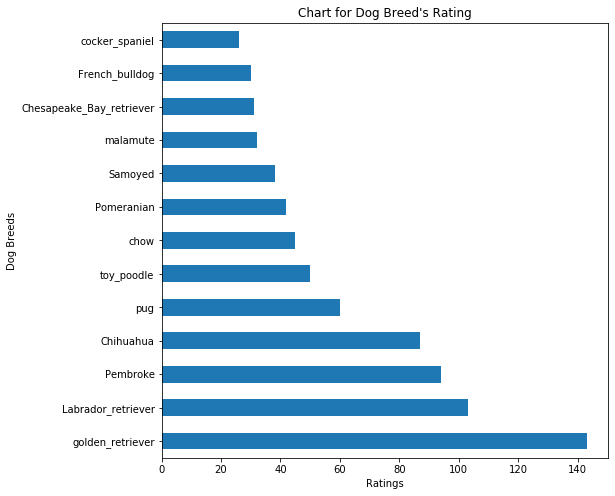

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
df_dog_type = df.groupby('dog_breed').filter(lambda x: len(x) >= 25)

# Plotting the data on the graph
df_dog_type['dog_breed'].value_counts().plot(kind = 'barh', figsize=(8,8))
plt.title("Chart for Dog Breed's Rating")
plt.xlabel('Ratings')
plt.ylabel('Dog Breeds');

Golden retriever is the highly rated dog breed.

### Relation between Retweets and ratings

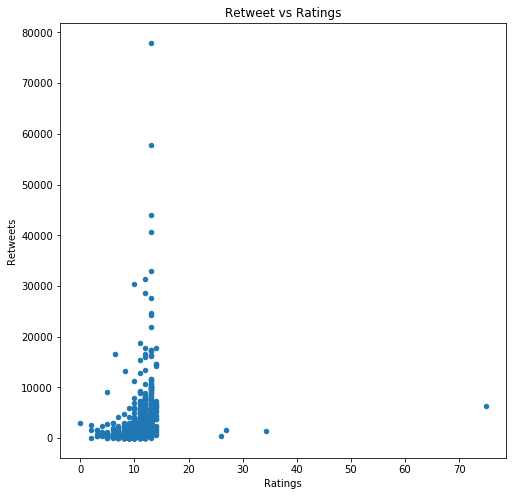

In [69]:
# Plotting the data on the graph
df.plot(y='retweets', x='rating', kind='scatter', figsize=(8,8))
plt.ylabel('Retweets')
plt.xlabel('Ratings')
plt.title('Retweet vs Ratings')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

There is a strong relation between retweets and ratings, while neglecting outliers

### Relation between retweet and favourites

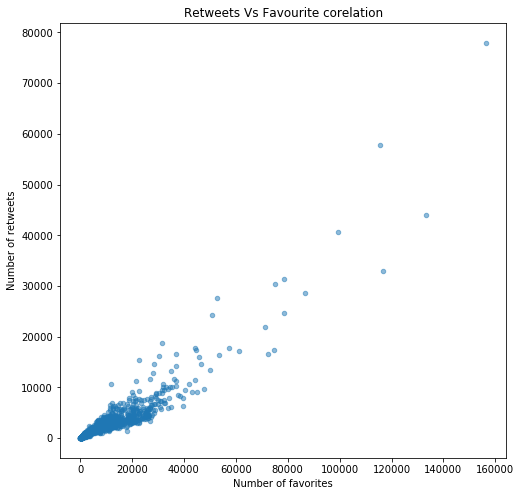

In [56]:
# Plotting the data on the graph
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5, figsize=(8,8))
plt.xlabel('Number of favorites')
plt.ylabel('Number of retweets')
plt.title('Retweets Vs Favourite corelation');

Retweet and favourites also having a strong relation in between.

### Rating System:

In [57]:
#standarize rating
df['stnd_rating']=df['rating']/10

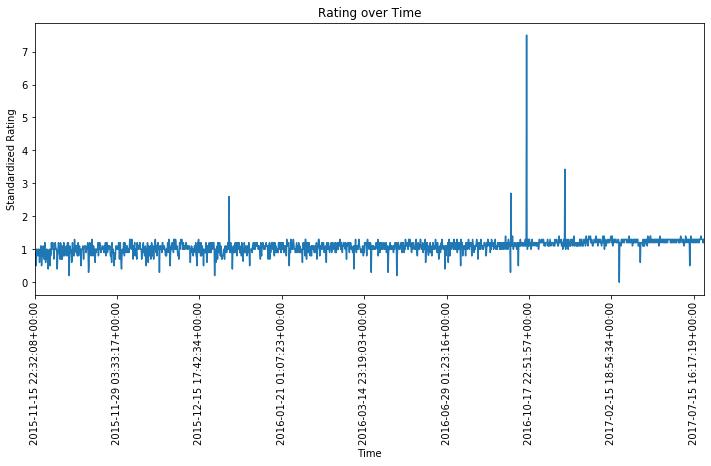

In [65]:
# Plotting the data on the graph
df.groupby('timestamp')['stnd_rating'].mean().plot(kind='line', figsize=(12,5))
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.xticks(rotation='vertical')
plt.show;

In [60]:
# To find the count of varying fields
print(df.shape[0])
val=df.shape[0]-(df.loc[df['stnd_rating'] > 2.5]).count()[0]
print(val)

1626
1622


There are 4 records in the dataset which are having standard rating greater than 2.5

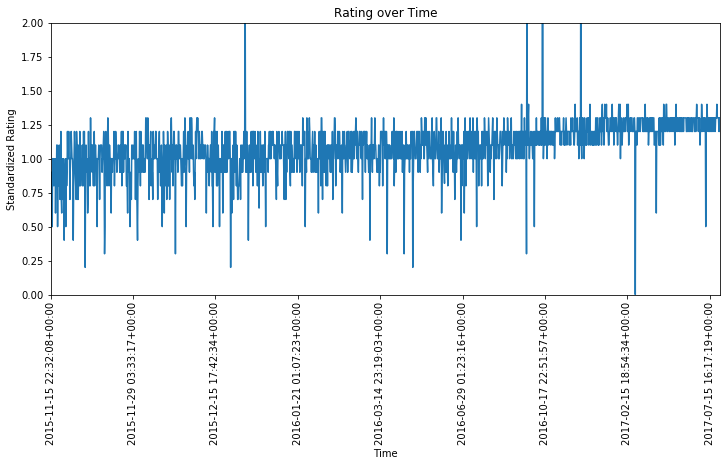

In [66]:
# Plotting the data on the graph
df.groupby('timestamp')['stnd_rating'].mean().plot(kind='line', figsize=(12,5))
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.xticks(rotation='vertical')
plt.show;

Days in which most of the ratings are below 1 to 1.25 which confirms WeRateDogs would give numerator values less than or equal to 10

### Mostly owned Dogs

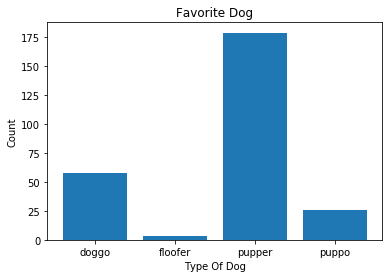

In [67]:
dog_counts = df.groupby('dog_type')['tweet_id'].count()

# Plotting the data on the graph
plt.bar([1, 2, 3, 4], dog_counts, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Favorite Dog')
plt.xlabel('Type Of Dog')
plt.ylabel('Count');

Pupper is the mostly owned dog type.

### Relation between User's followers and Retweets

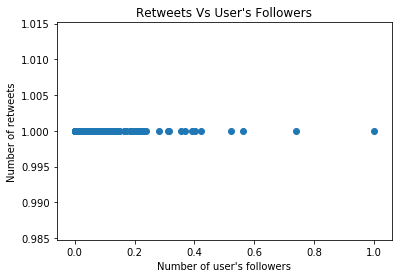

In [68]:
# Plotting the data on the graph
prop_retwt = df['retweets']/df['retweets'].max()
prop_uf = df['user_followers']/df['user_followers'].max()
plt.scatter(prop_retwt, prop_uf)
plt.xlabel("Number of user's followers")
plt.ylabel('Number of retweets')
plt.title("Retweets Vs User's Followers");

High number of followers are leading to the high number of retweets(since all are having high number of retweets so their is no variation)